<a href="https://colab.research.google.com/github/vyomaa/machine-failure-prediction/blob/main/FailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Failure Prediction Models Using Machine Learning Techniques

## Introduction

In this notebook, I explore and experiment with various data science techniques to predict machine failure. This is a classification task.
I will go over the process as thoroughly as possible to compare and contrast the results from various techniques in an attempt to improve evaluation metrics.

Steps:
1. Data Collection
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building
6. Evaluation

## 1. Installing dependencies

In this project, I use numpy, pandas, scikit-learn, seaborn, matplotlin

In [92]:
!pip install numpy pandas scikit-learn seaborn matplotlib

## 2. Data Collection
I get my dataset from Kaggle.
Credit to [umerrtx](https://www.kaggle.com/umerrtx) for the dataset [Machine Failure Prediction Using Sensor Data](https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data/data)


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d umerrtx/machine-failure-prediction-using-sensor-data

Dataset URL: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data
License(s): Apache 2.0
  0% 0.00/6.79k [00:00<?, ?B/s]
100% 6.79k/6.79k [00:00<00:00, 11.0MB/s]


In [4]:
!unzip machine-failure-prediction-using-sensor-data.zip

Archive:  machine-failure-prediction-using-sensor-data.zip
  inflating: data.csv                


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Exploratory Data Analysis (EDA)
Here, I look at the dataset, and its characteristics using visualization with seaborn and matplotlib.

In [95]:
data = pd.read_csv('data.csv')
data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [97]:
from sklearn.model_selection import train_test_split

X = data.drop(['fail'],axis=1)
y = data['fail']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
train_data=X_train.join(y_train)
train_data

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
244,22,3,7,1,6,5,28,4,14,1
82,0,6,4,3,6,2,91,1,5,0
316,0,6,5,3,6,5,64,2,15,1
350,9,7,5,1,4,5,79,7,16,1
465,0,7,5,2,4,4,52,3,17,1
...,...,...,...,...,...,...,...,...,...,...
106,390,7,4,5,3,1,43,3,7,0
270,29,1,5,2,4,2,25,5,14,0
860,23,5,6,3,6,6,49,6,23,1
435,110,7,4,2,6,4,76,4,17,1


Firstly, I plotted histograms for all the numerical data to observe their central tendency and spread and look out for outliers and skewness.


array([[<Axes: title={'center': 'footfall'}>,
        <Axes: title={'center': 'tempMode'}>,
        <Axes: title={'center': 'AQ'}>],
       [<Axes: title={'center': 'USS'}>, <Axes: title={'center': 'CS'}>,
        <Axes: title={'center': 'VOC'}>],
       [<Axes: title={'center': 'RP'}>, <Axes: title={'center': 'IP'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'fail'}>, <Axes: >, <Axes: >]],
      dtype=object)

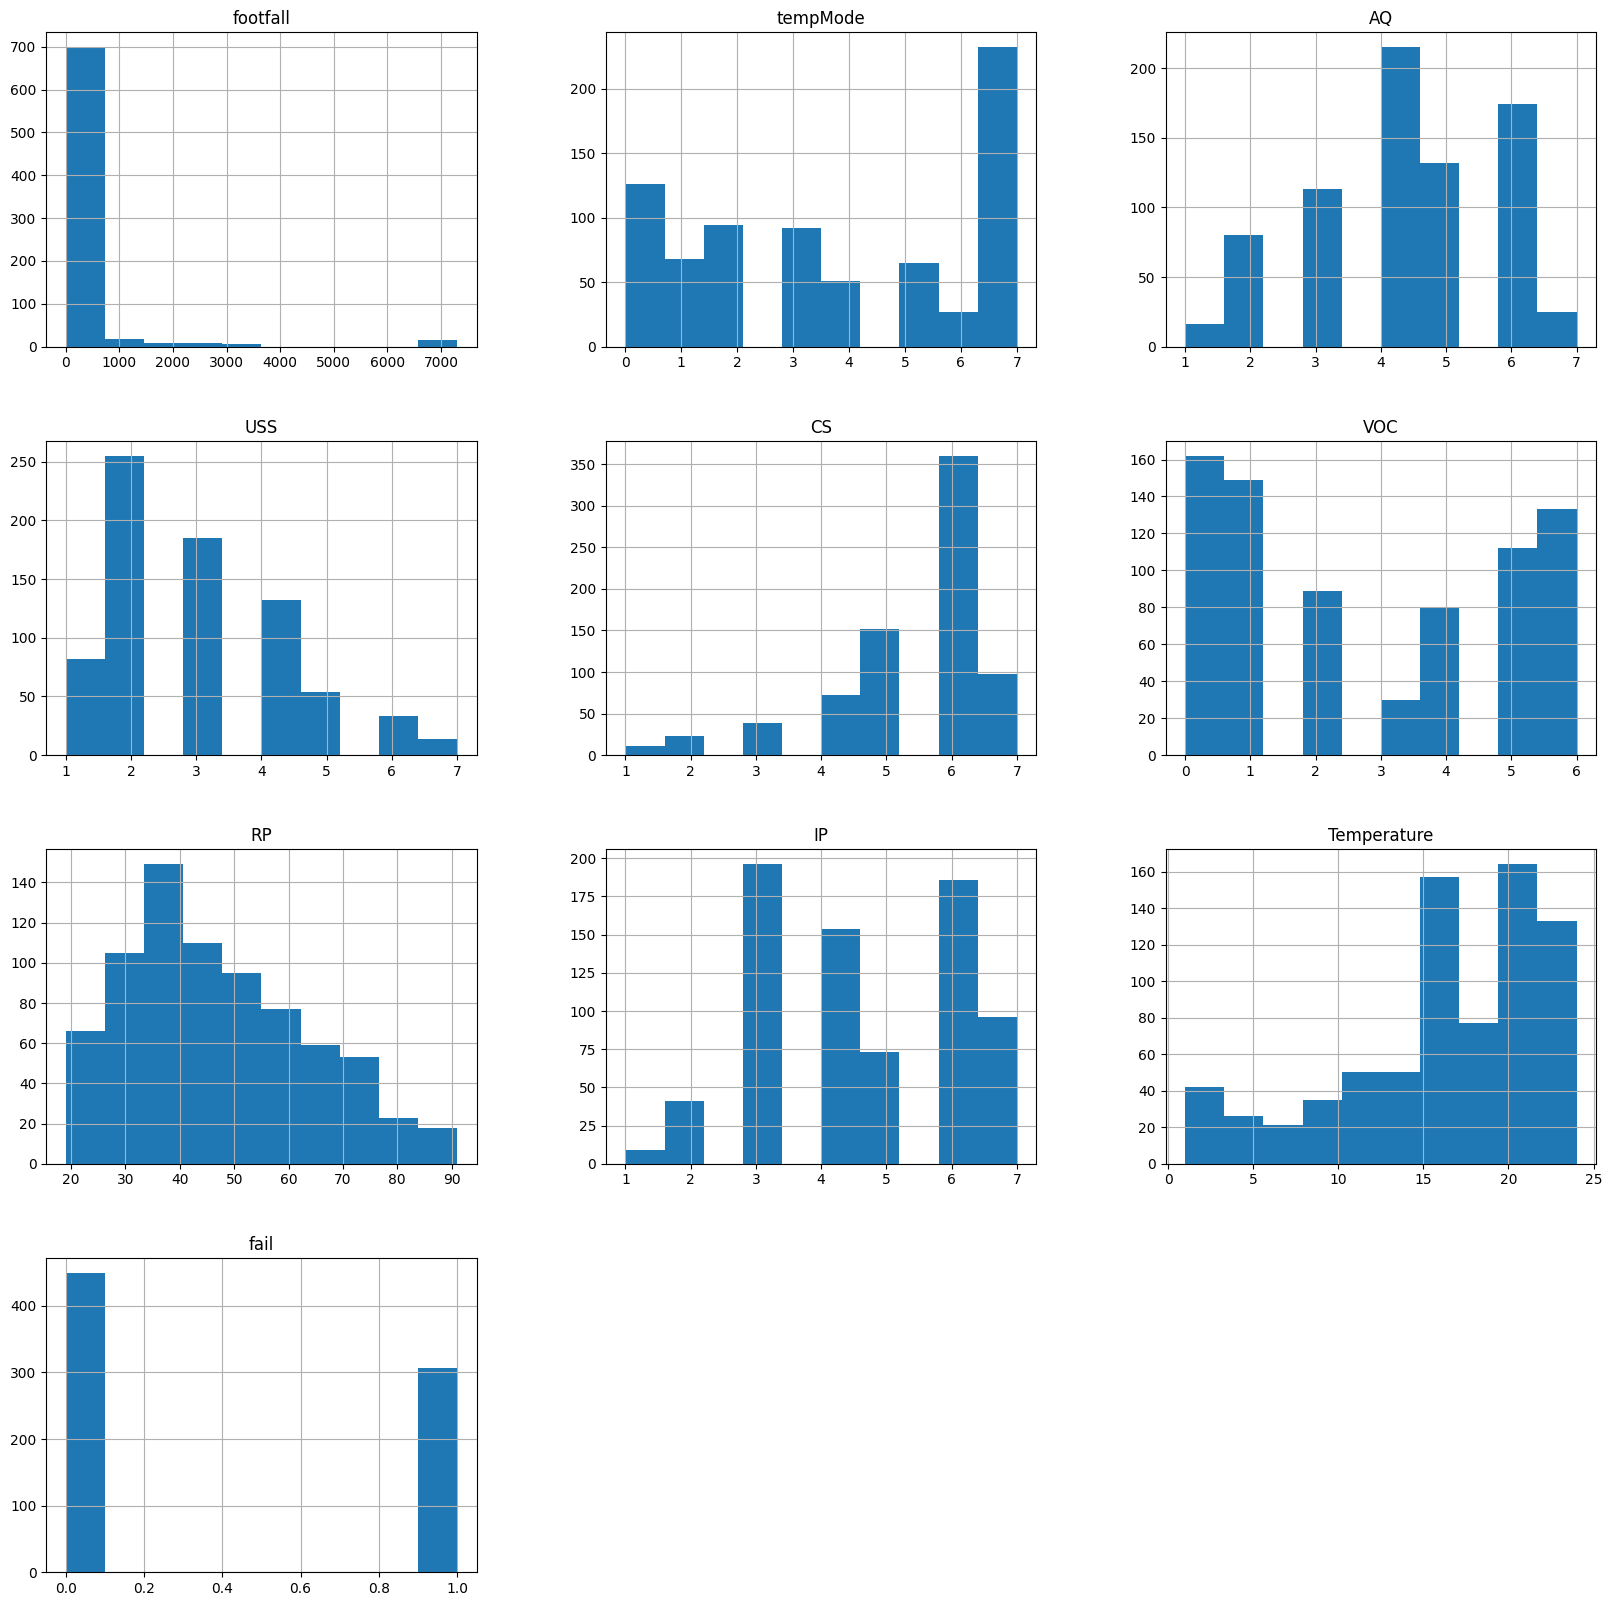

In [100]:
train_data.hist(figsize=(20,20))

Target Variable Distribution:
I plot a histogram to understand the distribution of the target variable to identify class imbalances

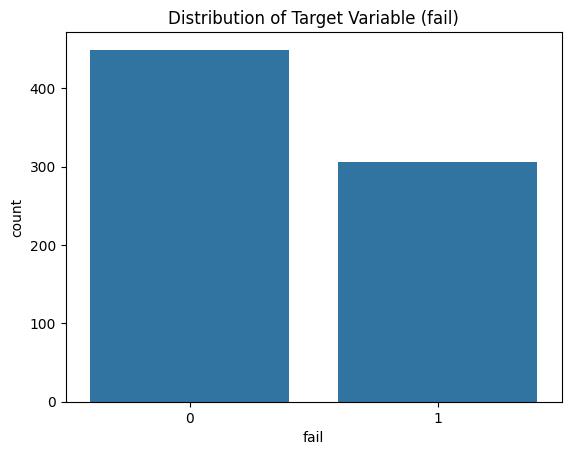

In [101]:
# Distribution of the target variable
sns.countplot(x='fail', data=train_data)
plt.title('Distribution of Target Variable (fail)')
plt.show()

Boxplots/Violin Plots

I use boxplots of each feature to see how it relates to the target variable: fail.

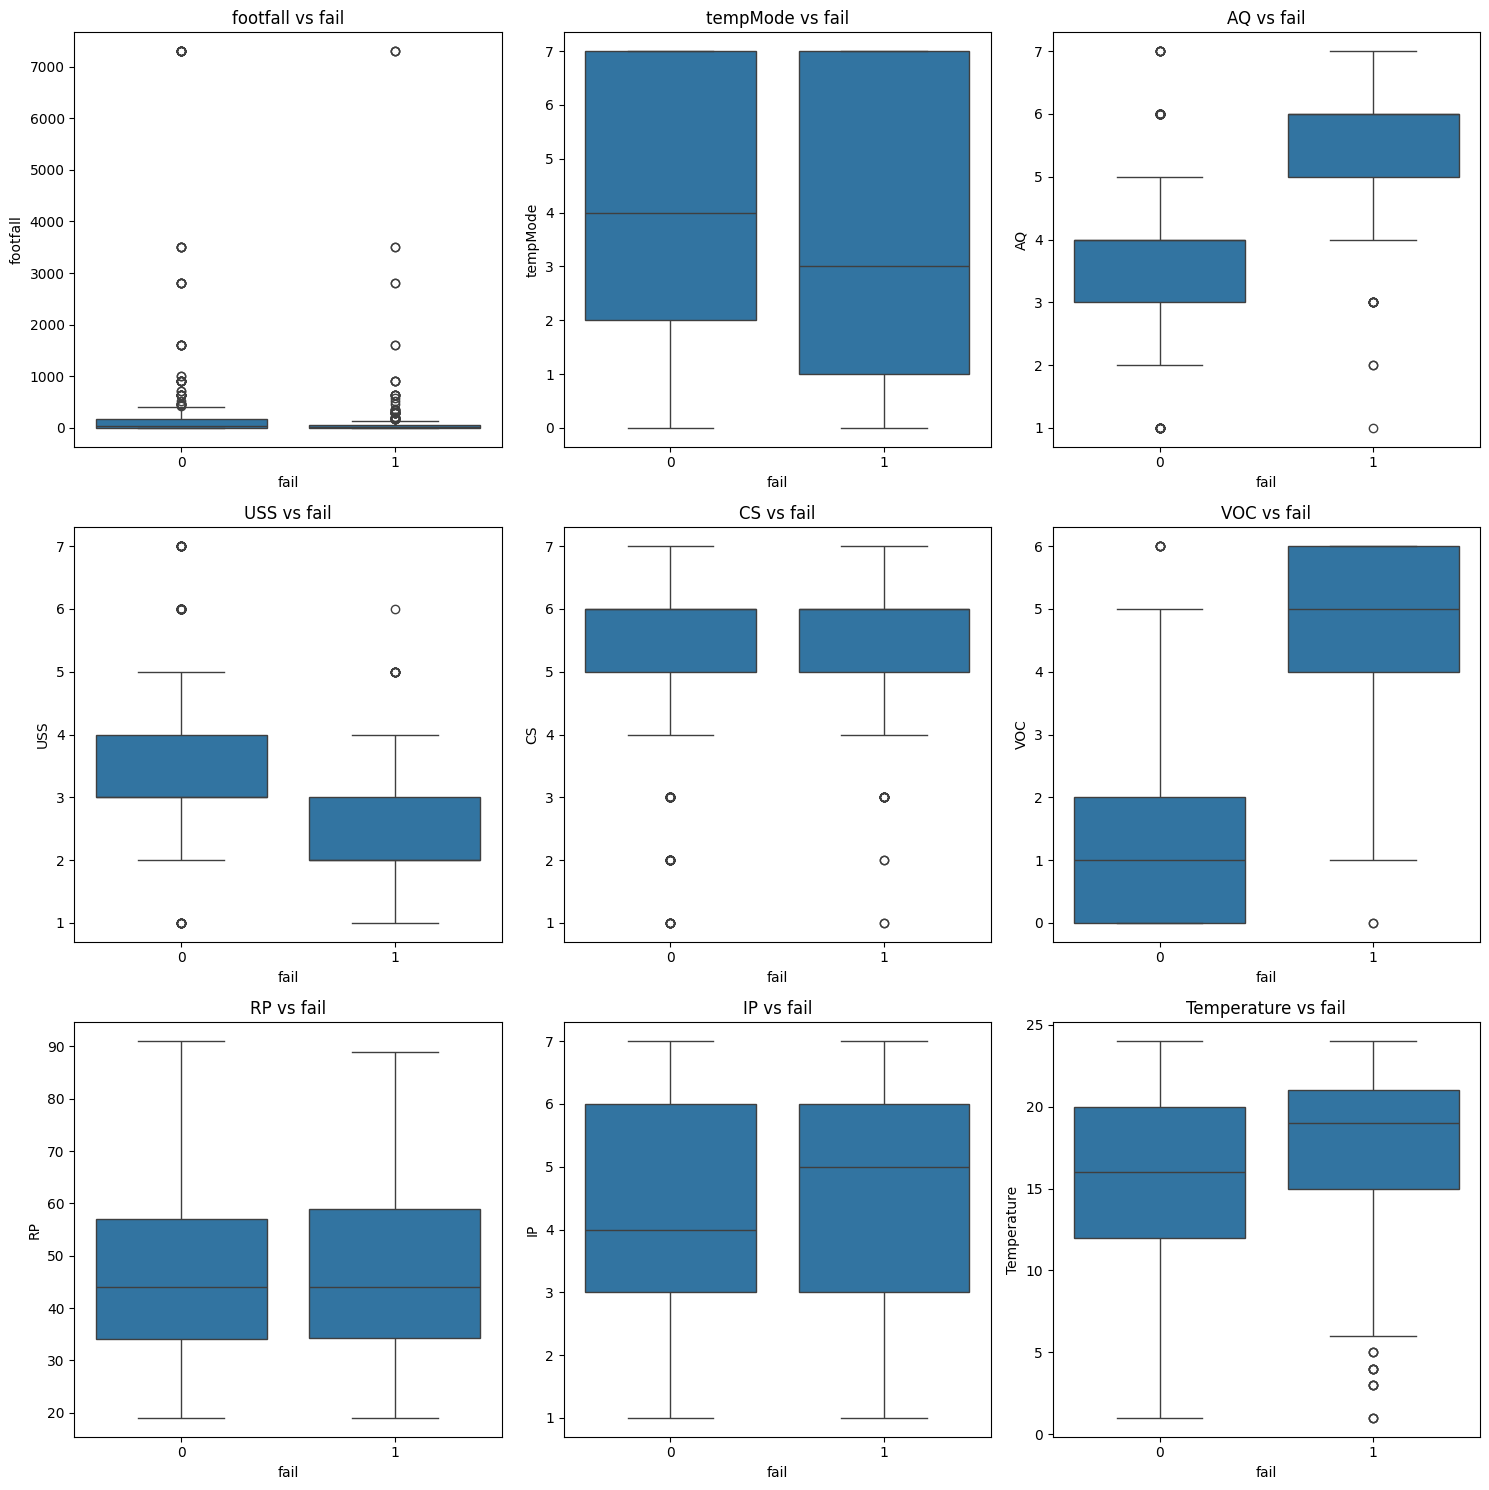

In [103]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(X_train.columns):
    sns.boxplot(x='fail', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs fail')
plt.tight_layout()

Correlation Matrix

I make a heatmap of the correlation matrix using seaborn to help see the  relationships between numerical features and the target variable and analyse how much they correlate. I will favor features that relate most closely to 'fail'. Moreover, this helps me analyze and catch any multicollinearity indicated by highly correlated features.

Text(0.5, 1.0, 'Correlation Matrix')

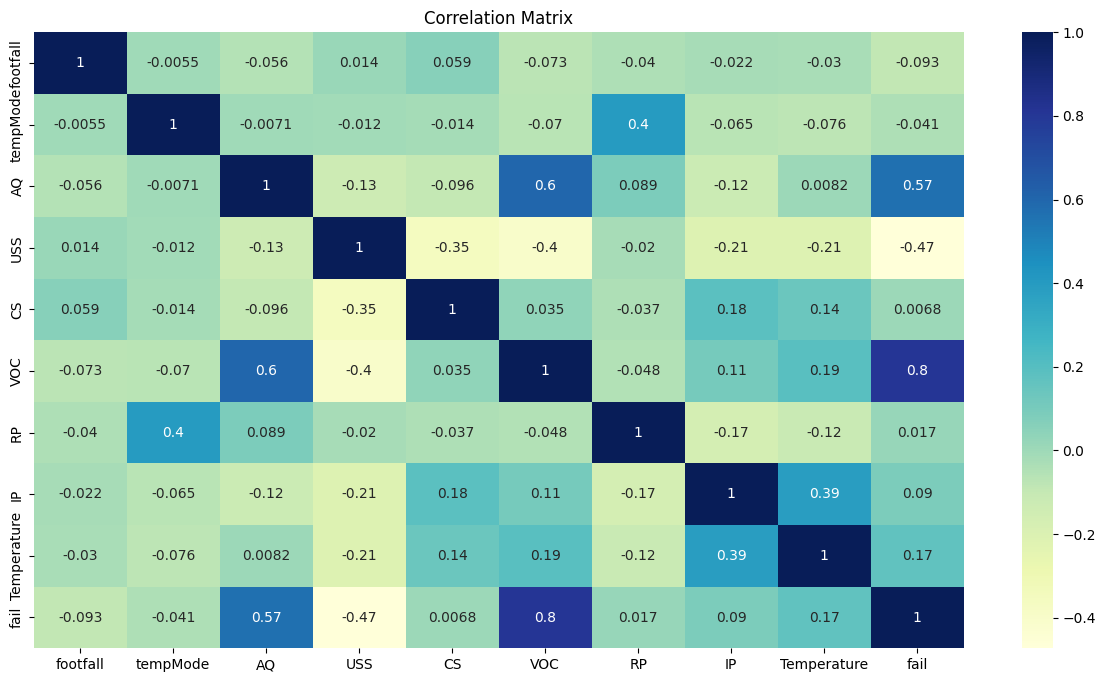

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')

Pairplot

The pairplot gives me more visual insight on how the features relate to each other and which features will be most distinguishing for the binary class fail.

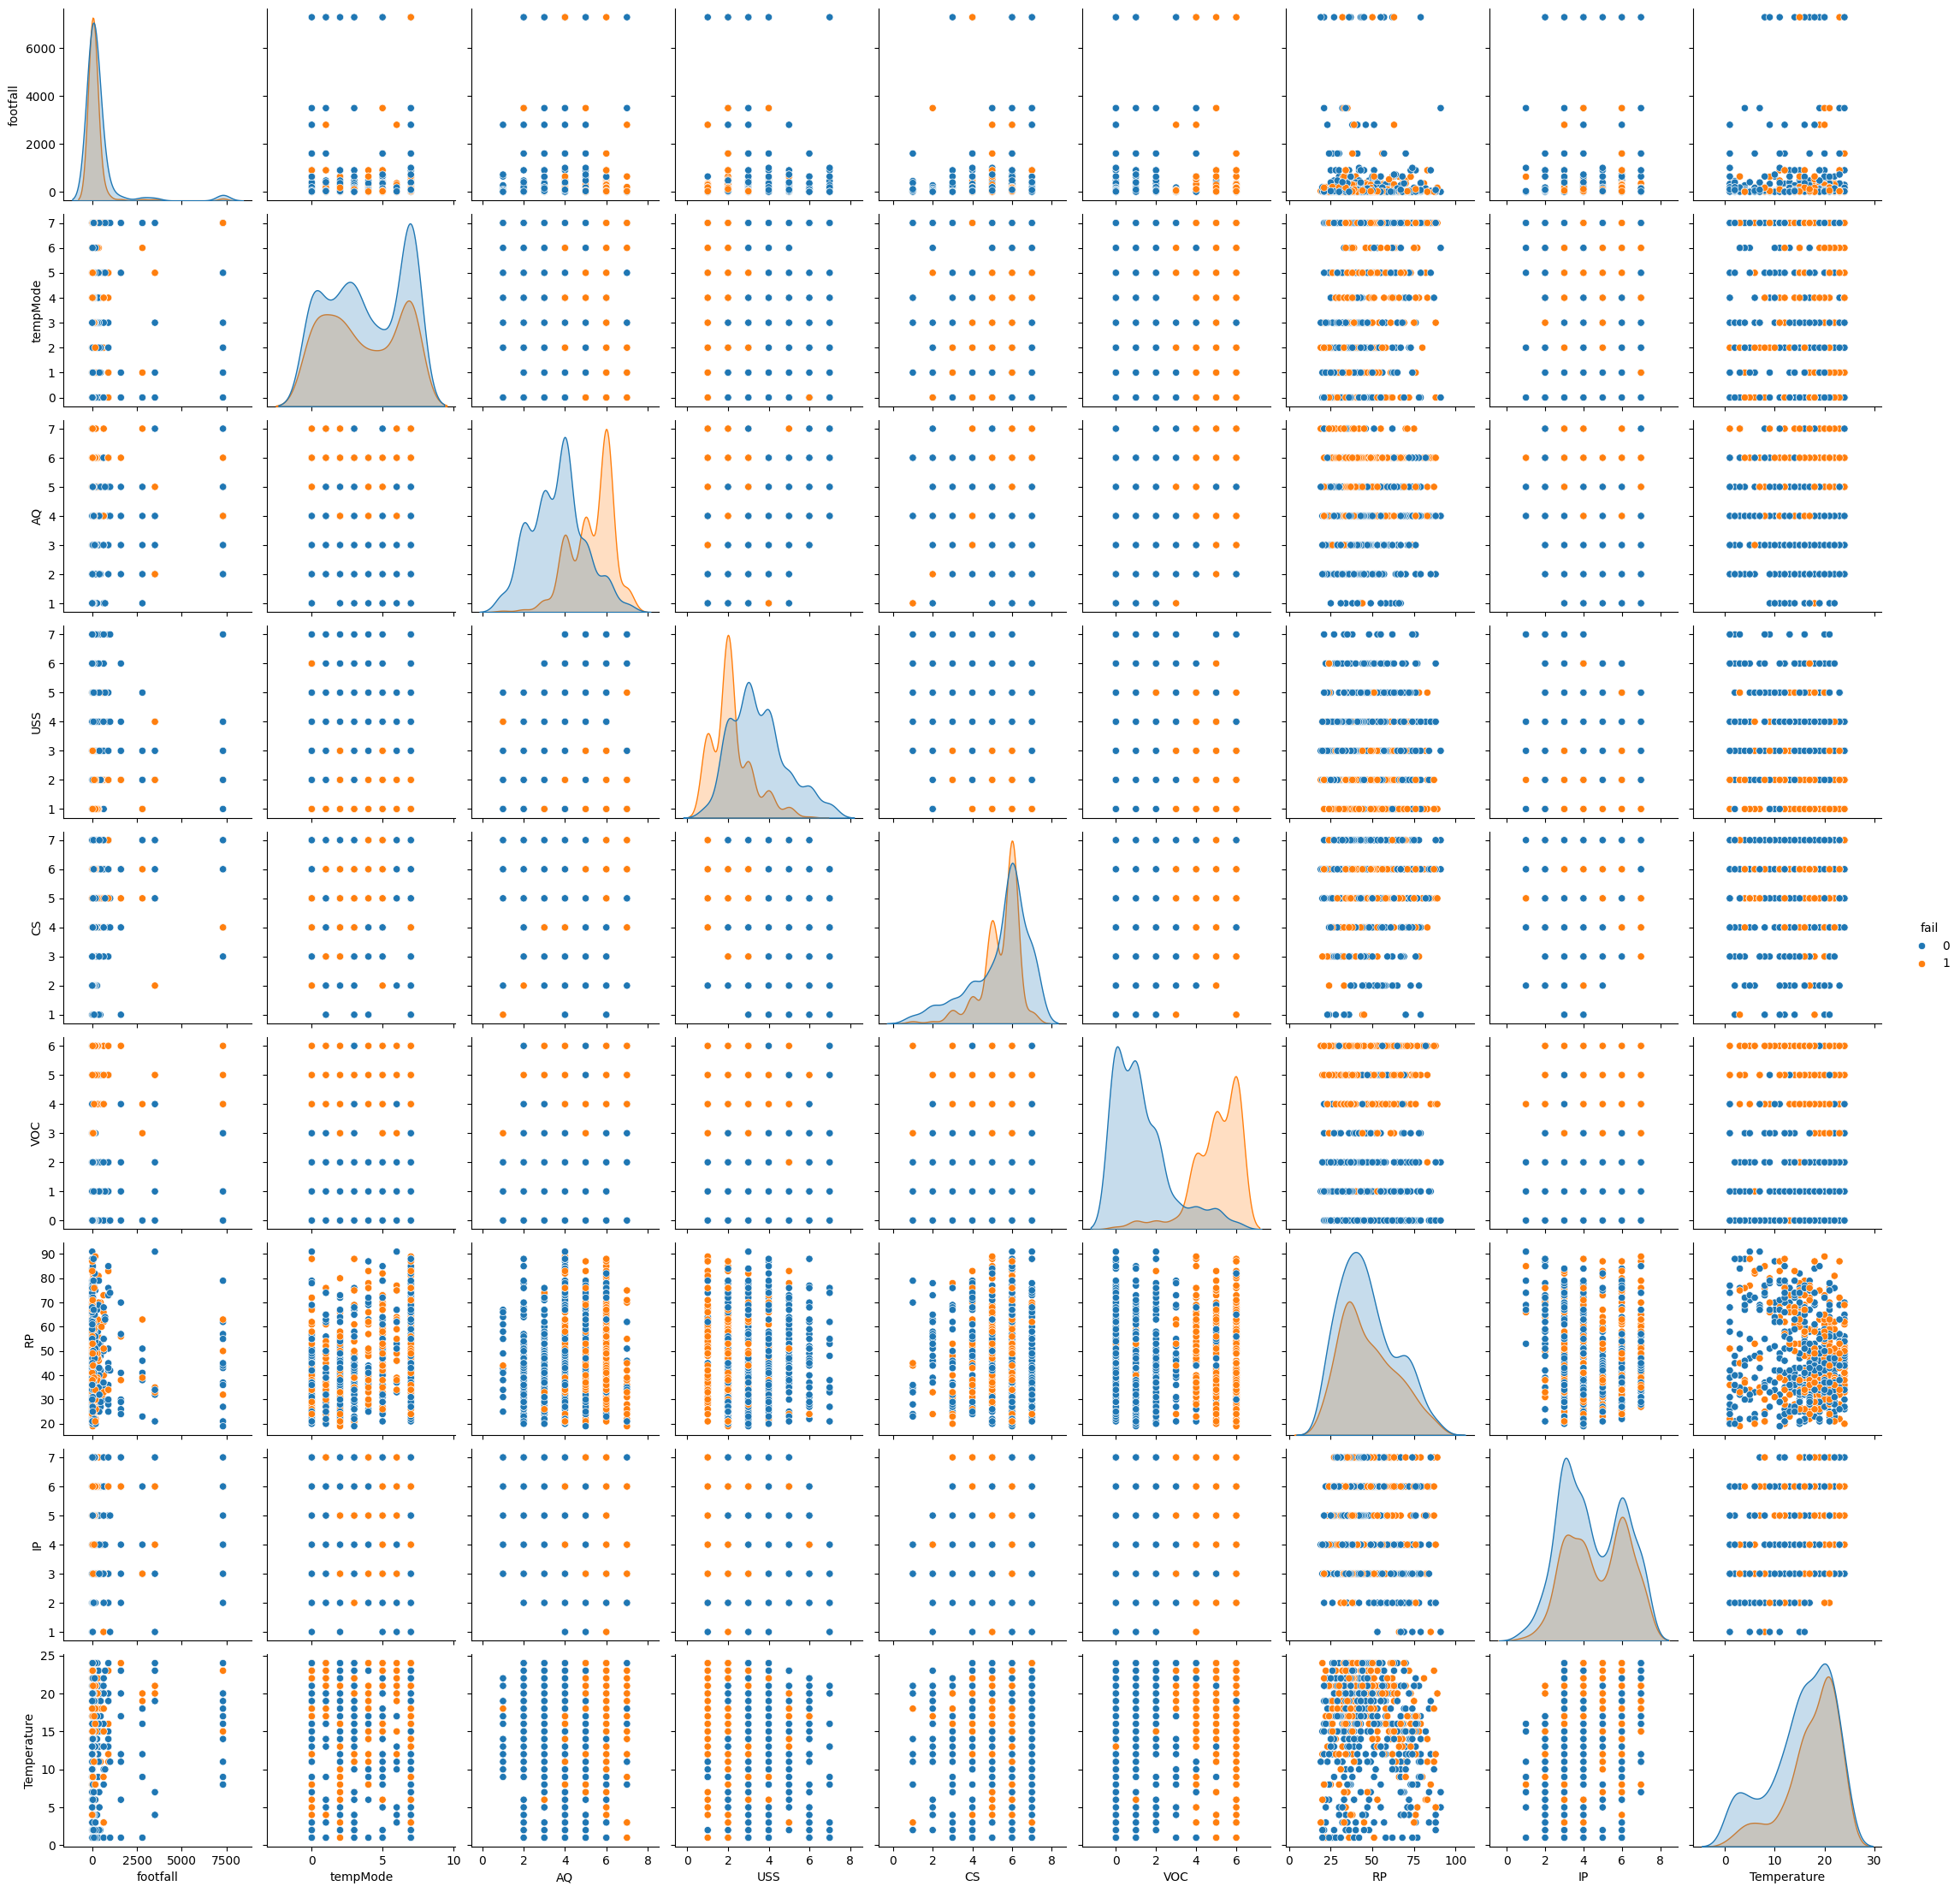

In [36]:
sns.pairplot(train_data, hue='fail')

## 4. Data Preprocessing

Based on EDA, I notice that
1. there is moderate class imbalance which can be overlooked
2. The distribution of some of the numerical features requires standardization
3. The distribution of football is heavily right skewed and requires log normalization
4. From the boxplot, I notice that AQ and VOC are strong indicators of failure so I intend to capitalize on this information going forward.
5. There is high correlation between AQ and VOC, and also tempMode and RP, so this needs to be looked into.

In [104]:
train_data['footfall'] = np.log1p(train_data['footfall'])

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['USS', 'CS', 'RP', 'IP', 'Temperature']
train_data[features] = scaler.fit_transform(train_data[features])

array([[<Axes: title={'center': 'footfall'}>,
        <Axes: title={'center': 'tempMode'}>,
        <Axes: title={'center': 'AQ'}>],
       [<Axes: title={'center': 'USS'}>, <Axes: title={'center': 'CS'}>,
        <Axes: title={'center': 'VOC'}>],
       [<Axes: title={'center': 'RP'}>, <Axes: title={'center': 'IP'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'fail'}>, <Axes: >, <Axes: >]],
      dtype=object)

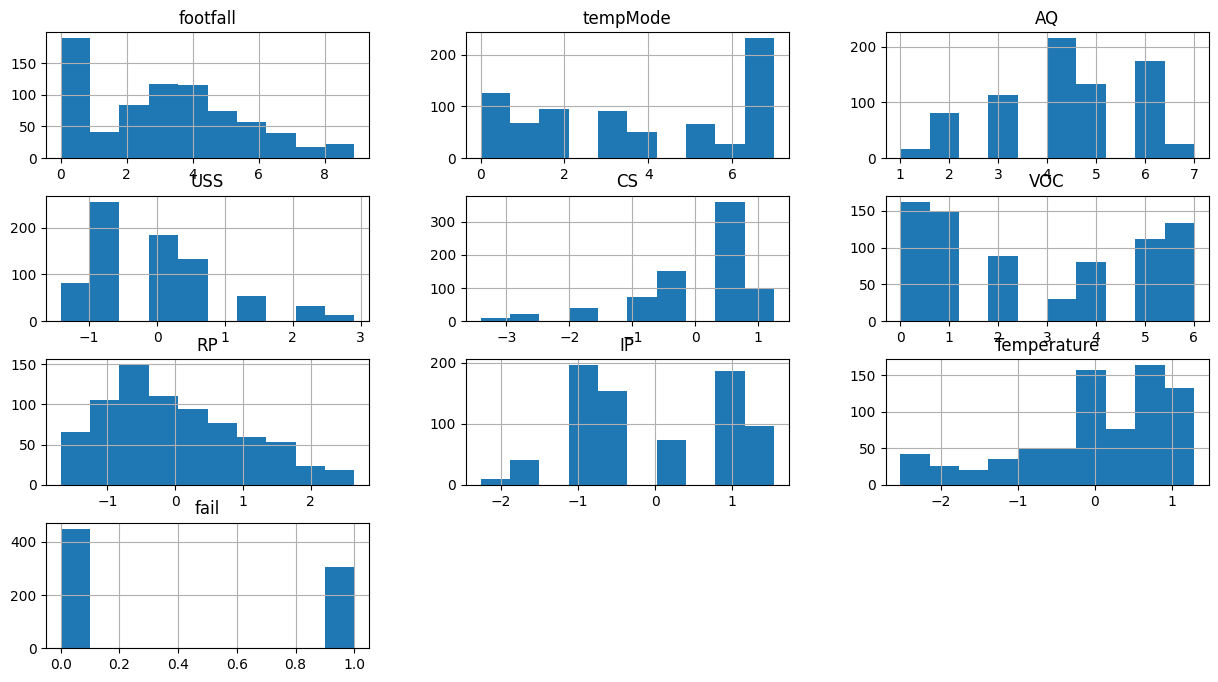

In [106]:
train_data.hist(figsize=(15,8))

## 5. Model Building

I test out various simple machine learning models that I think will work based on my intuition which I explain later.

### Rule-Based Model
You would notice that the AQ and VOC features strongly correlate with failure. So, I wanted to try to create a rule based model taking one of these features (VOC) and from the boxplot observing that VOC>3 usually leads to failure. This model already gives a high level of accuracy.

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# simple rule based model
y_pred = (X_test['VOC'] > 3).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8783068783068783
Precision: 0.8404255319148937
Recall: 0.9080459770114943
F1 Score: 0.87292817679558
Confusion Matrix:
 [[87 15]
 [ 8 79]]


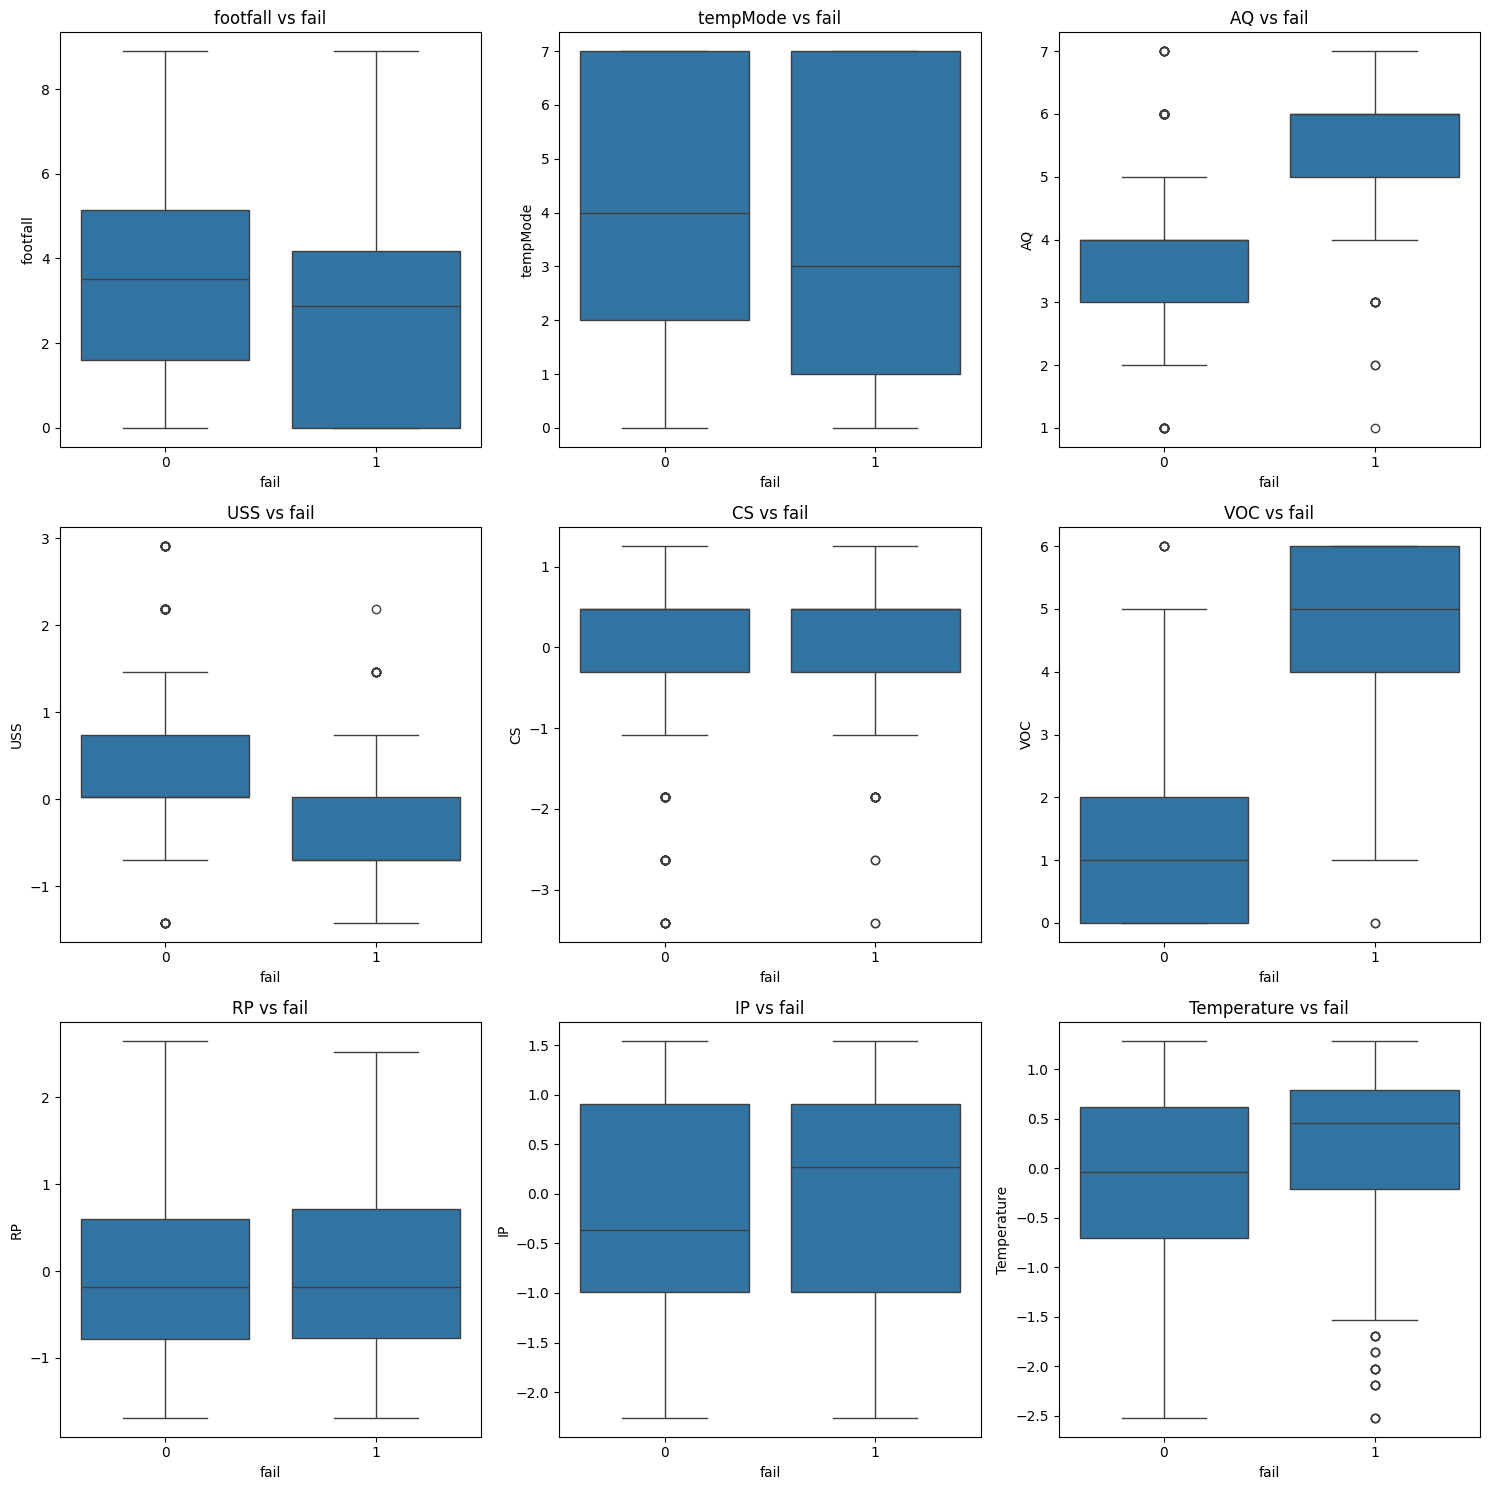

In [108]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(X_train.columns):
    sns.boxplot(x='fail', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs fail')
plt.tight_layout()

### Logistic Regression Model
I use scikit-learns Linear Regression Model with a threshold of 0.5 on the train data set to get an accuracy of87.8% which is comparable to the previous model.

In [109]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['fail'], axis=1), train_data['fail']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Here I normalize the test dataset as well

In [110]:
test_data = X_test.join(y_test)
test_data['footfall'] = np.log1p(test_data['footfall'])
scaler = StandardScaler()
features = ['USS', 'CS', 'RP', 'IP', 'Temperature']
test_data[features] = scaler.fit_transform(test_data[features])
X_test, y_test = test_data.drop(['fail'], axis=1), test_data['fail']

In [114]:
y_pred=reg.predict(X_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8783068783068783
Precision: 0.8478260869565217
Recall: 0.896551724137931
F1 Score: 0.8715083798882682
Confusion Matrix:
 [[88 14]
 [ 9 78]]


### Random Forest Algorithm
Next, I attempt to use a random forest algorithm as decision trees seem like they would be good at predicting failure considering the presence of many distinguishing features.

I start by enhancing the features first using Feature Engineering.

First I try to find irrelevant features to drop however I find none (despite my intuition that some like RP, CS, IP seem useless)

Secondly, I create an interaction term AQ_VOC to bolster the power of the Random Forest Algorithm


Thirdly, I try to find important features but all of them come out as importance (again going against my intuition). This gives 88.8% accuracy.

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

features_to_drop = vif[vif['VIF'] > 10]['Feature'].tolist()
features_to_drop

[]

In [116]:
# Interaction Terms
X_train['AQ_VOC'] = X_train['AQ'] * X_train['VOC']
X_test['AQ_VOC'] = X_test['AQ'] * X_test['VOC']

In [117]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = feature_importance[feature_importance['Importance'] > 0.01]['Feature'].tolist()
top_features

['AQ_VOC',
 'VOC',
 'USS',
 'AQ',
 'CS',
 'RP',
 'footfall',
 'Temperature',
 'IP',
 'tempMode']

In [118]:
y_pred=forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8888888888888888
Precision: 0.8666666666666667
Recall: 0.896551724137931
F1 Score: 0.8813559322033899
Confusion Matrix:
 [[90 12]
 [ 9 78]]


### Random Forest Optimized with Grid Search

I use a parameter grid to find the most optimal parameters for Random Forest. This hugely improves the model performance: 92.6% on the train data. and 89.4% on test data.

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [1, 3, 5, 7, 9]
}

grid_search = GridSearchCV(forest, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

In [120]:
print(best_params)
print(best_score)
print(best_model)

{'max_depth': 9, 'n_estimators': 200}
0.9165665380804823
RandomForestClassifier(max_depth=9, n_estimators=200)


In [121]:
y_pred=grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8941798941798942
Precision: 0.8764044943820225
Recall: 0.896551724137931
F1 Score: 0.8863636363636365
Confusion Matrix:
 [[91 11]
 [ 9 78]]


### SVM Classifier

Next I attempt to use an SVM classifier to see if this method proves better than decision trees. I use a parameter grid to maximize my chances of getting a higher accuracy. I use the traditional parameter grid setup. The accuracy reduces to 87.8% which is good enough and this is the last model I use.

In [127]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svc = SVC(kernel='linear')
selector = RFE(svc, n_features_to_select=2, step=1)
selector = selector.fit(X_train_s, y_train)
X_train_s = selector.transform(X_train_s)
X_test_s = selector.transform(X_test_s)

poly = PolynomialFeatures(degree=2)
X_train_s = poly.fit_transform(X_train_s)
X_test_s = poly.transform(X_test_s)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_s, y_train)

# Print the best parameters
print(f"Best Parameters: {grid.best_params_}")

# Train the SVM model with the best parameters
svm = grid.best_estimator_
svm.fit(X_train_s, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

SVC(C=1, gamma=1, kernel='linear')

In [128]:
y_pred=svm.predict(X_test_s)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8783068783068783
Precision: 0.8555555555555555
Recall: 0.8850574712643678
F1 Score: 0.8700564971751412
Confusion Matrix:
 [[89 13]
 [10 77]]


## 6. Final Conclusion/Evaluation

Here, I summarize the findings and compare the performance of the models and suggest possible improvements or next steps.

| Method             | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| Rule-Based  | 0.8783     | 0.8404      | 0.9080   | 0.8729     |
| Linear Regression         | 0.8783     | 0.8478      | 0.8965   | 0.8715     |
| Random Forest      | 0.8888     | 0.8666      | 0.8965   | 0.8813     |
| Random Forest with GridSearchCV | 0.8941 | 0.8764 | 0.8965 | 0.8863
| Support Vector Machine (SVM) | 0.8783 | 0.8555 | 0.8850 | 0.8700     |

Note:

*Accuracy*: The ratio of correctly predicted instances to the total instances.

*Precision*: The ratio of correctly predicted positive observations to the total predicted positives.

*Recall*: The ratio of correctly predicted positive observations to the all observations in actual class.

*F1-Score*: The weighted average of Precision and Recall, giving a balance between the two.

Using neural networks and gradient descent algorithms would be a good next step, however due to the simplicity of the dataset, I believe finding more distinguishing features would not be likely and that this is the best accuracy achievable.

-Vyoma